<a href="https://colab.research.google.com/github/RFankhauser/MSc_WI_BINA/blob/main/MSc_WI_BINA_Erstes_Projekt_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob

#Verbinden mit Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/Coffee_Shop_Sales.xlsx" #Dateipfad Google Drive

df_raw = pd.read_excel(file_path, index_col=0) #Laden der Datei
display(df_raw.head(1))

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
transaction_id,,,,,,,,,,
1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg


Zusammenführung Datum + Zeit

In [ ]:
df = df_raw.copy() #Kopieren der Datei
df['transaction_time'] = df['transaction_time'].astype(str)
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])
df["transaction_date"] = df["transaction_date"] + df["transaction_time"]
df.drop('transaction_time', axis=1, inplace=True) #Löschen der Zeit Spalte

display(df.head(1))

,transaction_date,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
transaction_id,,,,,,,,,
1,2023-01-01 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg


Hinzufügen einer neuen Spalte (Total) + Berechnung

In [ ]:
df["total_price"] = df["transaction_qty"] * df["unit_price"]

display(df.head(1))

,transaction_date,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_price
transaction_id,,,,,,,,,,
1,2023-01-01 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0


Erste Grafik: Umsatz pro Getränkeart

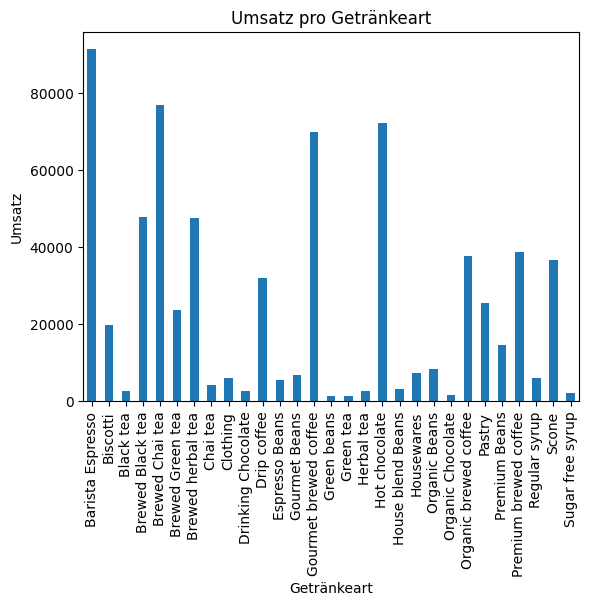

In [ ]:
grouped_data = df.groupby('product_type')['total_price'].sum()

grouped_data.plot(kind='bar')
plt.xlabel('Getränkeart')
plt.ylabel('Umsatz[CHF]')
plt.title('Umsatz pro Getränkeart')
plt.show()


Zeite Grafik: Umsatz pro Filiale

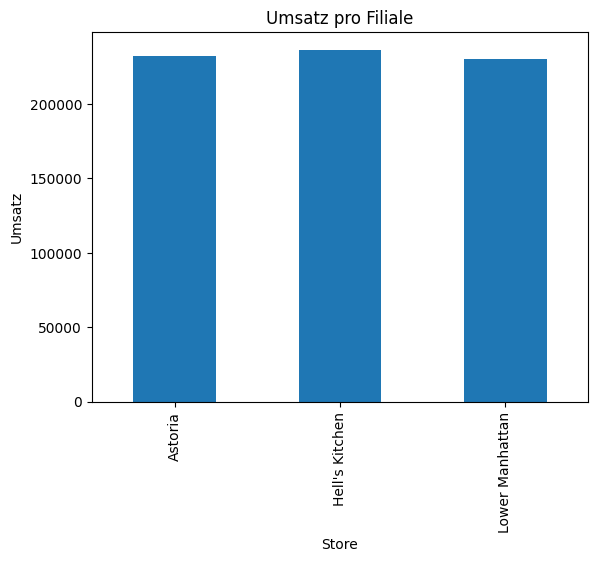

In [ ]:
grouped_data = df.groupby('store_location')['total_price'].sum()

grouped_data.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Umsatz [CHF]')
plt.title('Umsatz pro Filiale')
plt.show()

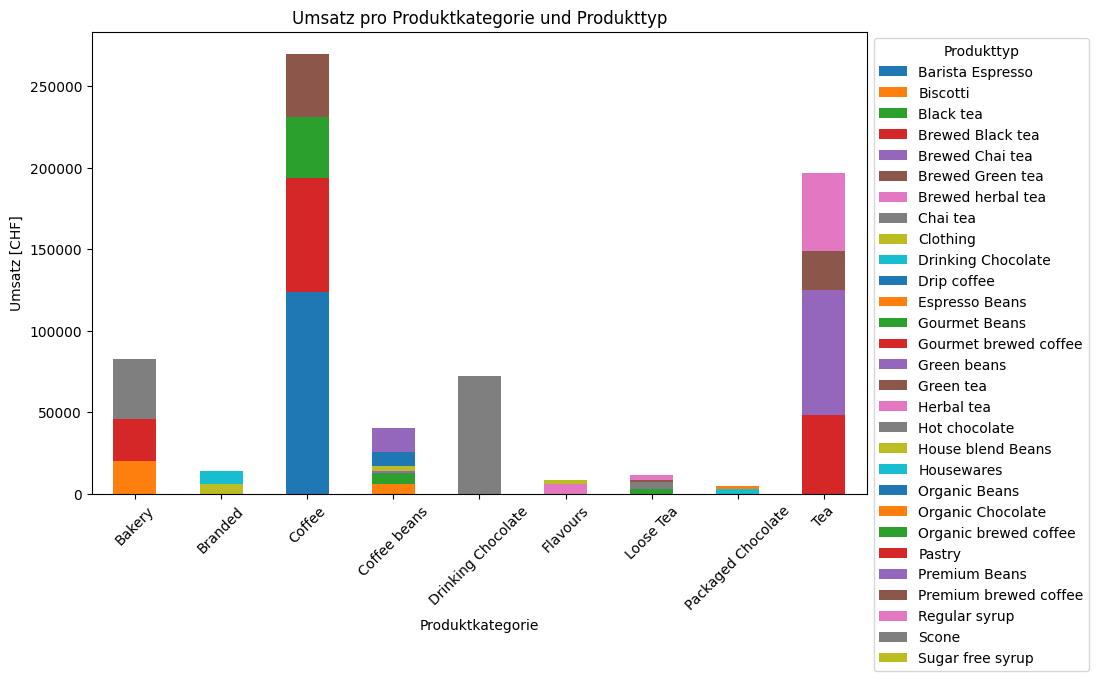

In [ ]:
# Daten nach Kategorie & Typ gruppieren
grouped_data = df.groupby(['product_category', 'product_type'])['total_price'].sum().unstack()

# Balkendiagramm mit gestapelten Farben für Produkttypen
grouped_data.plot(kind='bar', stacked=True, figsize=(10,6))

plt.xlabel('Produktkategorie')
plt.ylabel('Umsatz [CHF]')
plt.title('Umsatz pro Produktkategorie und Produkttyp')
plt.legend(title="Produkttyp",loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.show()

In [2]:
print("ich übernehme")

ich übernehme
